In [1]:
import numpy

In [2]:
import cython

In [3]:
from classy import Class

In [4]:
import emcee

In [5]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/julesbuet/MasterProject/montepython_public-3.6.0/montepython"))
from MontePython import *

In [6]:
log10_a_table = [-0.73, -0.1, -5]
log10_kstar_table = [8.14, 9.25, 3]
delta_table = [1.46, 2.45, 1.3]

def pps(k, a, kstar, delta):
    a_s =  2.0989e-9
    n_s = 0.9649
    k_pivot = 0.05
    return (a_s*(k/k_pivot)**(n_s-1) + a/(numpy.sqrt(2*numpy.pi)*delta)*numpy.exp(-(numpy.log(k/kstar))**2/(2*delta*delta)))
    

In [7]:
def case1_pps(k):
    return pps(k, 10**(log10_a_table[0]), 10**(log10_kstar_table[0]), delta_table[0])
print(case1_pps(10))

1.742711891735914e-09


In [8]:
def case2_pps(k):
    return pps(k, 10**(log10_a_table[1]), 10**(log10_kstar_table[1]), delta_table[1])

In [9]:
def case3_pps(k):
    return pps(k, 10**(log10_a_table[2]), 10**(log10_kstar_table[2]), delta_table[2])

In [10]:
cosmo = Class()
k = 10**(log10_kstar_table[0])
a = 10**(log10_a_table[0])/(numpy.sqrt(2*numpy.pi)*delta_table[0])
alpha = -1/(delta_table[0]*delta_table[0]*2.303*2.303)
#params = {
#        'output': 'tCl lCl pCl', 
#        'modes': 's', # scalar perturbations
#        'lensing': 'yes',
#        'P_k_ini type': 'external_Pk',
#        'k1': 0.02,
#        'k2': 100}
params = {
        'output': 'tCl, lCl, pCl, Sd, mPk',
        'l_max_scalars': 25000,
        'lensing': 'yes',
        'modes': 's',
        'P_k_ini type': 'analytic_Pk',
        'k_pivot': k,
        'A_s': a,
        'alpha_s': alpha,
        'n_s':1,
        'P_k_max_1/Mpc':10**4}
cosmo.set(params)
#cosmo.set(command = "cat Pk_generated_0.cat")
cosmo.compute()

In [11]:
# get all C_l output
cls = cosmo.lensed_cl(25000)
sd = cosmo.spectral_distortion()
# To check the format of cls
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [12]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clTP = cls['tp'][2:]
clPP = cls['pp'][2:]
clBB = cls['bb'][2:]
clEE = cls['ee'][2:]
clTE = cls['te'][2:]

In [13]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

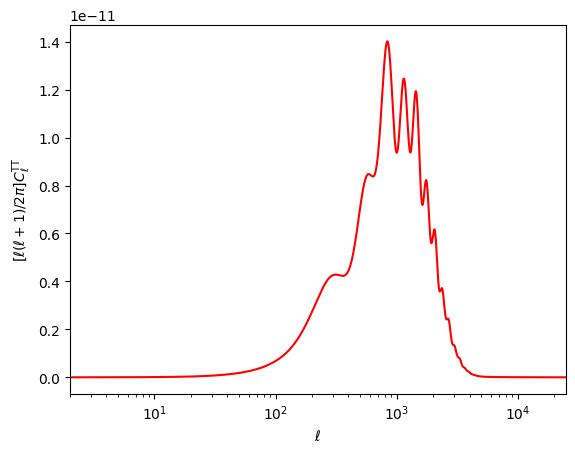

In [14]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,25000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

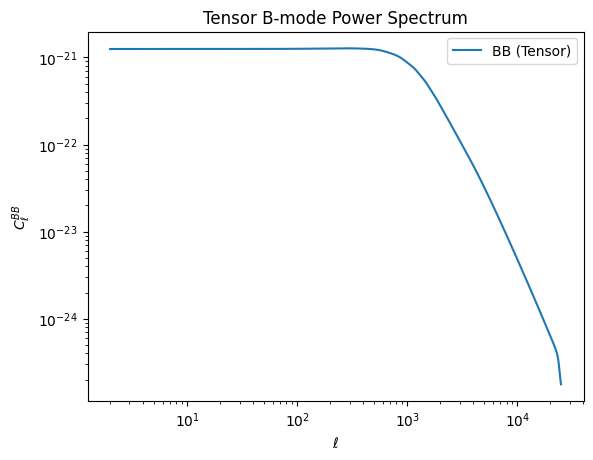

In [15]:
plt.plot(ll, clBB, label='BB (Tensor)')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{BB}$')
plt.legend()
plt.title('Tensor B-mode Power Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [16]:
cosmo.spectral_distortion_amplitudes()

array([ 7.09080161e-04,  9.12572817e-07,  1.40627782e-03,  7.82142004e-05,
       -1.51529247e-04])

In [17]:
primordial_spectrum = cosmo.get_primordial()
print(primordial_spectrum.keys())
k_values = primordial_spectrum['k [1/Mpc]']  # Wavenumbers
P_t = primordial_spectrum['P_scalar(k)']  # Tensor power spectrum values

dict_keys(['k [1/Mpc]', 'P_scalar(k)'])


In [20]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-7,np.log10(10**4),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(cosmo.pk(k*h,0.)*h**3) # function .pk(k,z)

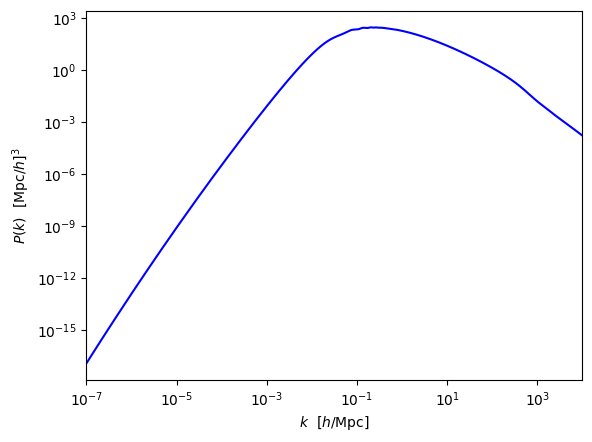

In [21]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')

3600